In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense,Flatten, Dropout
from tensorflow.keras.models import Model
import tensorflow as tf

In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist

(X_train,Y_train),(X_test,Y_test)=fashion_mnist.load_data()







4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train,X_test=X_train/255.0, X_test/255.0

print("Shape of X_Train: ",X_train.shape)

Shape of X_Train:  (60000, 28, 28)


In [ ]:
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ",X_test.shape)

Shape of X_train:  (60000, 28, 28, 1)
Shape of X_test:  (10000, 28, 28, 1)


In [ ]:
K=(len(set(Y_train)))
print("Number of classes: ",K)

Number of classes:  10


In [ ]:
#Building the model using the keras functional API

i=Input(X_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(K,activation='softmax')(x)

model=Model(i,x)



In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

r=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=15)

Epoch 1/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.5139 - accuracy: 0.8099 - val_loss: 0.4054 - val_accuracy: 0.8486
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3557 - accuracy: 0.8660 - val_loss: 0.3434 - val_accuracy: 0.8681
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3086 - accuracy: 0.8841 - val_loss: 0.3123 - val_accuracy: 0.8813
Epoch 4/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2741 - accuracy: 0.8971 - val_loss: 0.3061 - val_accuracy: 0.8900
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2492 - accuracy: 0.9068 - val_loss: 0.2978 - val_accuracy: 0.8949
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2289 - accuracy: 0.9135 - val_loss: 0.2913 - val_accuracy: 0.9000
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2120 - accuracy: 0.9196 - val_loss: 0.3003 - val_ac

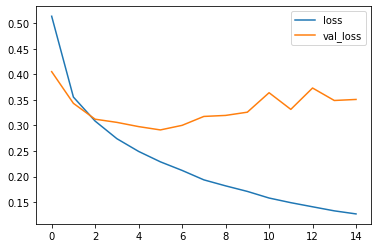

In [ ]:
#Plotting loss per iteration

import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

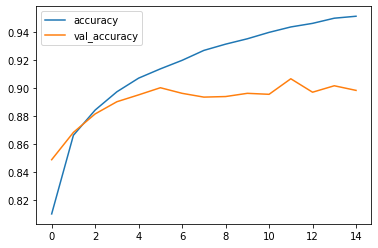

In [ ]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

Confusion Matrix without Normalization
[[869   1  22  19   6   2  75   0   6   0]
 [  1 978   0  14   2   0   3   0   2   0]
 [ 16   1 855   8  58   0  61   0   1   0]
 [ 14   4  24 882  42   0  32   0   2   0]
 [  1   0  48  20 843   0  86   0   2   0]
 [  0   0   0   0   0 968   1  22   1   8]
 [131   1  58  30  78   0 693   0   9   0]
 [  0   0   0   0   0   8   0 949   1  42]
 [  1   0   0   1   6   1   8   2 981   0]
 [  0   0   0   0   0   6   1  30   0 963]]


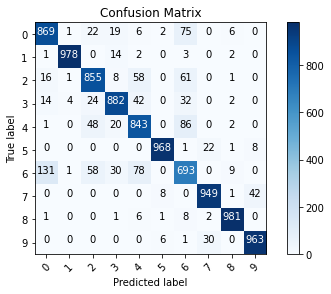

In [ ]:
#plotting the confussion matrix

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix without Normalization")

  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt='.2f' if normalize else 'd'
  thresh=cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center',color='white' if cm[i,j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label") 
  plt.show()


p_test=model.predict(X_test).argmax(axis=1)
cm=confusion_matrix(Y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))


NameError: ignored

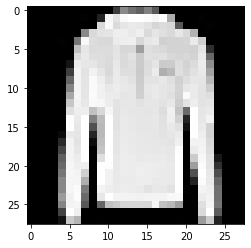

In [ ]:
#Show some misclassified examples
labels="""

In [ ]:

misclassified_idx=np.where(p_test!=Y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28,28),cmap='gray')
plt.title("True label: %s Predicted: %s "% (labels[Y_test[i]]),labels[p_test[i]])